
<ul>
    <b>1. Import Necessary Libraries</b>

</ul>


<ul>
<b>2. Read In and Explore the Data</b>
   <li> Imputing missing values   </li>

</ul>
<ul> 
<b>3. Exploratory Data Analysis Data Visualization</b>
    A.Univariate analysis
    <li>   i.   Catplots- for categoical features </li>
    <li>   ii.  PDFs and QQ-plots - for continues r.v </li>
     <li>  iii. CDF </li>
     <li>  iv.  Inter Quantile range  </li>
</ul>   
<ul>      
<b>4. Data pre-processing and cleaning</b>
  <li>   A.Removing outliers manually
      using where clause on dataframes </li>
   <li>  B.Converting all features to numerical features  </li>
   <li>  c.Removing Unwanted columns </li>
   <li>  D.Removing outliers using standard methods 
      using zscore </li>
   <li>  E. Train_test split</li>
</ul> 
<ul>
<b>5. Building Models</b>
   <li>   A.KNN</li>
   <li>   B.Linear Regression</li>
    <li>  C.Logistic Regression</li>
    <li>  D.SVM</li>
   <li>   E.Decision Tree</li>
    <li>  F.Ensembles</li>
    <li>   i.  Bagging - Randomforest</li>
     <li>  ii. Boosting - GBDT</li>
     <li>  iii.Stacking -Using SGDclassifier and Stackingclassifier in mlxtend</li>
      <li> iv. Xgboost</li>
   
</ul>     
<ul>
<b>6. Model Comparison</b>
</ul>    
<ul>
<b>7. Creating Submission File</b>
</ul>

# 1. Import Necessary Libraries

In [9]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV

from sklearn.model_selection import train_test_split

from sklearn.metrics import roc_curve, auc,classification_report,accuracy_score
from sklearn.metrics import mean_squared_error ,mean_absolute_error,log_loss
from sklearn.metrics import confusion_matrix

import warnings
warnings.filterwarnings('ignore')

# 2. Read In and Explore the Data

In [10]:
#converting into dataframe
df_train = pd.read_csv('employee_data.csv')

In [11]:
df_train.shape

(1000, 7)

In [12]:
df_train.describe()

,Unnamed: 0,id,age,healthy_eating,active_lifestyle,salary
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,499.500000,499.500000,41.155000,4.944000,5.683000,2227.46100
std,288.819436,288.819436,13.462995,2.013186,2.048587,1080.20976
min,0.000000,0.000000,18.000000,0.000000,0.000000,553.00000
25%,249.750000,249.750000,30.000000,4.000000,4.000000,1360.00000
50%,499.500000,499.500000,41.000000,5.000000,6.000000,2174.00000
75%,749.250000,749.250000,53.000000,6.000000,7.000000,2993.75000
max,999.000000,999.000000,64.000000,10.000000,10.000000,5550.00000


In [13]:
df_train.head()

,Unnamed: 0,id,groups,age,healthy_eating,active_lifestyle,salary
0,0,0,A,36,5,5,2297
1,1,1,A,55,3,5,1134
2,2,2,A,61,8,1,4969
3,3,3,O,29,3,6,902
4,4,4,O,34,6,2,3574


In [14]:
df_train=df_train.drop(['Unnamed: 0'],axis=1)

In [15]:
df_train.head()

,id,groups,age,healthy_eating,active_lifestyle,salary
0,0,A,36,5,5,2297
1,1,A,55,3,5,1134
2,2,A,61,8,1,4969
3,3,O,29,3,6,902
4,4,O,34,6,2,3574


### Imputing Missing Values with Medians

In [16]:
df_train.isnull().sum()

id                  0
groups              0
age                 0
healthy_eating      0
active_lifestyle    0
salary              0
dtype: int64

# 3. Exploratory Data Analysis Data Visualization

## A.Univariate analysis

## i. Histograms /Categorical Plots

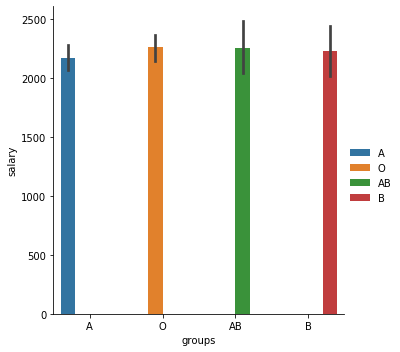

In [18]:
sns.catplot(x="groups", y="salary",hue="groups", kind="bar", data=df_train)\
             .add_legend();

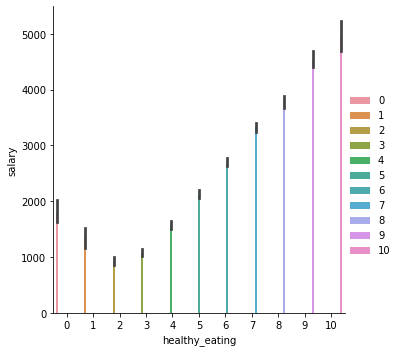

In [19]:
sns.catplot(x="healthy_eating", y="salary",hue="healthy_eating", kind="bar", data=df_train)\
             .add_legend();

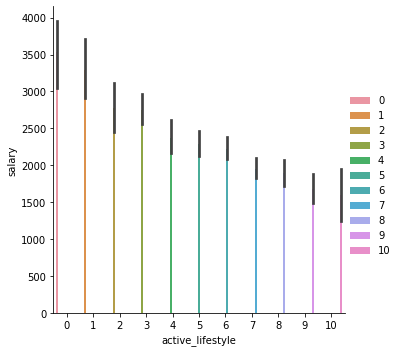

In [20]:
sns.catplot(x="active_lifestyle", y="salary",hue="active_lifestyle", kind="bar", data=df_train)\
             .add_legend();

## ii.PDF : Only for continues r.v like age

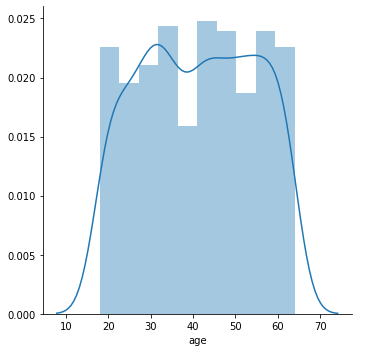

In [23]:
import seaborn as sb
sb.FacetGrid(df_train,height=5)\
    .map(sb.distplot,'age')\
    .add_legend();
plt.show()

In [25]:
df_train['age'].mode()

0    62
dtype: int64

## Q-Q plot

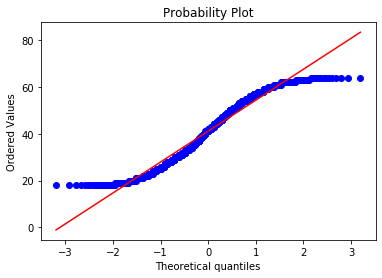

In [26]:
# we can check the distributin if whole data have continues rv but there are some categorical features which can't be distributed
import pylab 
import scipy.stats as stats
stats.probplot(df_train['age'], dist="norm", plot=pylab)
pylab.show()

## iv. Boxplots

## iv.Inter quantile range 

In [30]:
for i in range(0,101):
    print(i,np.round(np.percentile(df_train['age'],i),3))

0 18.0
1 18.0
2 18.0
3 19.0
4 19.0
5 20.0
6 20.0
7 21.0
8 21.0
9 22.0
10 22.0
11 23.0
12 23.0
13 24.0
14 25.0
15 25.0
16 25.84
17 26.0
18 27.0
19 27.0
20 28.0
21 28.0
22 28.78
23 29.0
24 30.0
25 30.0
26 30.0
27 31.0
28 31.0
29 31.0
30 32.0
31 32.0
32 33.0
33 33.0
34 33.0
35 34.0
36 34.0
37 35.0
38 35.0
39 36.0
40 36.0
41 37.0
42 37.0
43 38.0
44 38.0
45 39.0
46 39.54
47 40.0
48 41.0
49 41.0
50 41.0
51 42.0
52 42.0
53 43.0
54 43.0
55 44.0
56 44.0
57 44.0
58 45.0
59 45.41
60 46.0
61 46.0
62 47.0
63 47.0
64 48.0
65 48.0
66 49.0
67 49.0
68 50.0
69 50.0
70 50.3
71 51.0
72 51.0
73 52.0
74 52.0
75 53.0
76 53.24
77 54.0
78 54.0
79 55.0
80 55.0
81 55.19
82 56.0
83 56.17
84 57.0
85 57.0
86 58.0
87 58.0
88 59.0
89 59.0
90 60.0
91 60.0
92 61.0
93 61.0
94 62.0
95 62.0
96 62.0
97 63.0
98 63.0
99 64.0
100 64.0


# 4. Data pre-processing and cleaning

## A. Cleaning data Manually

#### Other way to remove outliers is zscore but it needs all fetures to be numerical

In [506]:
# If data has outliers then we can remove them by using zscore<br>
#from scipy import stats
#z=abs(stats.zscore(df_train))
#print(np.where(z>3))
#df_train=df_train[(z<3).all(axis=1)]

## B.Converting all features to numerical features 

#### First we need to convert the string values to int so that we can apply the distance based models like KNN 

In [31]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
#df_train['Name']= label_encoder.fit_transform(df_train['Name']) 
df_train['groups']= label_encoder.fit_transform(df_train['groups'])  

## C.Removing Unwanted columns

## D.Removing outliers using standard methods

In [32]:
# If data has outliers then we can remove them by using zscore<br>
from scipy import stats
z=abs(stats.zscore(df_train))
print(np.where(z>3))
df_train=df_train[(z<3).all(axis=1)]

(array([607], dtype=int64), array([5], dtype=int64))


### E .Train_test Split

In [33]:
y=df_train['salary']
x=df_train.drop(['salary'],axis=1)


In [34]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [35]:
round(X_train, 2)

,id,groups,age,healthy_eating,active_lifestyle
311,311,2,62,3,10
605,605,3,28,1,5
439,439,2,56,4,7
0,0,0,36,5,5
316,316,3,20,4,3
...,...,...,...,...,...
106,106,0,56,6,5
270,270,1,51,10,4
861,861,3,33,5,8
435,435,3,41,7,5


# Note: Important too check before applying models

### As the output is real number we need check the distribution of dependent variable in test and train

0    549
1    342
Name: Survived, dtype: int64

In [41]:
# as this is a classificatoin task we cannot use MSE we can use Accuracy but it not works well with imbalane data so we use AUC-ROC

# first we need to calculate the tpr ,fpr , threshold values to draw the confusion matrix and AUC-ROC curve



# 5. Building Models

# Model1 : KNN

In [43]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
neigh = KNeighborsRegressor()

parameters = {'n_neighbors': range(1,100,10)}

clf = GridSearchCV(neigh, parameters, cv= 5)

clf.fit(X_train, y_train)



GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30,
                                           metric='minkowski',
                                           metric_params=None, n_jobs=None,
                                           n_neighbors=5, p=2,
                                           weights='uniform'),
             iid='warn', n_jobs=None,
             param_grid={'n_neighbors': range(1, 100, 10)},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [44]:
clf.best_params_

{'n_neighbors': 21}

In [70]:
#KNN classifier sklearn : https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score

neigh = KNeighborsRegressor(n_neighbors=21)
neigh.fit(X_train, y_train)

y_test_pred = neigh.predict(X_test)
print(r2_score(y_test,y_test_pred))


-0.023638922082749092


# Model 2 : Logistic Regression 

In [57]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

parameters = [{'C': [10**-4, 10**-2, 10**0, 10**2, 10**4]}]

model = GridSearchCV(LogisticRegression(),parameters, cv=5)
model.fit(X_train, y_train)    

print(model.best_estimator_)
print(model.score(X_train, y_train))

LogisticRegression(C=100, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)
0.3333333333333333


In [58]:
model.best_params_

{'C': 100}

In [59]:
from sklearn.model_selection import cross_val_score

C= [10**-4, 10**-2, 10**0, 10**2, 10**4]
k_scores = []

for k in C:
    #
    Lr = LogisticRegression(C=k)
    
    scores = cross_val_score(Lr,X_train, y_train, cv=10, scoring='accuracy')
    
    k_scores.append(scores.mean())
print(k_scores)

[0.04892010214631863, 0.07866055549355469, 0.14389089603966637, 0.1896734799459761, 0.19249776627154613]


In [60]:
import math as mt
log_C=[]
for i in C:
     log_C.append(mt.log10(i))

Text(0, 0.5, 'Cross-Validated Accuracy')

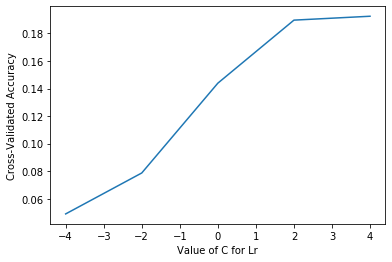

In [61]:
# plot the value of K for KNN (x-axis) versus the cross-validated accuracy (y-axis)
plt.plot(log_C, k_scores)
plt.xlabel('Value of C for Lr')
plt.ylabel('Cross-Validated Accuracy')

In [69]:
from sklearn.metrics import roc_curve, auc

Lr = LogisticRegression(C=100)
Lr.fit(X_train, y_train)

y_test_pred = Lr.predict(X_test)

print(r2_score(y_test,y_test_pred))

0.3333333333333333
0.7628484889820459


# Model 3 : Linear regression 

In [73]:
from sklearn.linear_model import LinearRegression
Lr = LogisticRegression()
Lr.fit(X_train, y_train)

y_test_pred = Lr.predict(X_test)

print(r2_score(y_test,y_test_pred))

0.6711364912693774


# Model 4 : SVM

In [74]:
from sklearn.svm import SVR

parameters = [{'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf']}]   #'poly','sigmoid' takes too much time

model = GridSearchCV(SVR(),parameters, cv=5)
model.fit(X_train, y_train)    

print(model.best_estimator_)
print(model.score(X_train, y_train))

SVR(C=1000, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.001,
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)
0.3554681261605988


In [75]:
model.best_params_

{'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}

In [77]:
from sklearn.model_selection import cross_val_score

C= [10**-4, 10**-2, 10**0, 10**2, 10**4]
k_scores = []

for k in C:
    #
    svm = SVR(C=k,gamma= 0.0001,kernel='rbf')
    
    scores = cross_val_score(svm,X_train, y_train, cv=10)
    
    k_scores.append(scores.mean())
print(k_scores)

[-0.02797320406000601, -0.027975467846709946, -0.027984990947256594, -0.04594326848375248, 0.5694206950394539]


In [78]:
import math as mt
log_C=[]
for i in C:
     log_C.append(mt.log10(i))

Text(0, 0.5, 'Cross-Validated Accuracy')

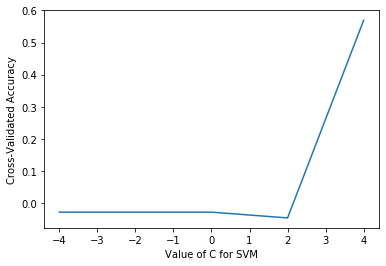

In [80]:
# plot the value of K for KNN (x-axis) versus the cross-validated accuracy (y-axis)
plt.plot(log_C, k_scores)
plt.xlabel('Value of C for SVM')
plt.ylabel('Cross-Validated Accuracy')

In [82]:
from sklearn.svm import SVR

clf = SVR(C=1000,gamma=0.001,kernel= 'rbf')

clf.fit(X_train, y_train)

y_test_pred = clf.predict(X_test)

print(r2_score(y_test,y_test_pred))

0.1045503393053746


# Model 5 : Decision Tree

In [88]:
#https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor


parameters = {'max_depth': [5, 10, 50, 100]}

clf = DecisionTreeRegressor(criterion='mse')

model = GridSearchCV(clf,parameters,cv=3)

model.fit(X_train, y_train)    

print(model.best_estimator_)
print(model.score(X_train, y_train))


DecisionTreeRegressor(criterion='mse', max_depth=50, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')
1.0


In [89]:
model.best_params_

{'max_depth': 50}

In [90]:
from sklearn.model_selection import cross_val_score

max_depth= [1,5,15,25,50]
k_scores = []

for k in max_depth:
    #
    DT = DecisionTreeRegressor(max_depth=k,criterion='mse', min_samples_split=100)
    
    scores = cross_val_score(DT,X_train, y_train, cv=10)
    
    k_scores.append(scores.mean())
print(k_scores)

[0.6204127850277277, 0.8872434777323199, 0.8871661445617013, 0.8871661445617013, 0.8871661445617013]


Text(0, 0.5, 'Cross-Validated Accuracy')

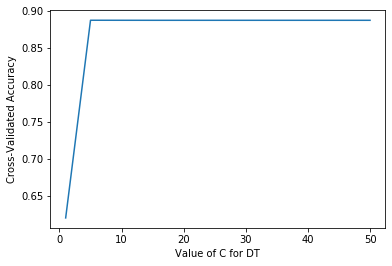

In [92]:
# plot the value of K for KNN (x-axis) versus the cross-validated accuracy (y-axis)
plt.plot(max_depth, k_scores)
plt.xlabel('Value of C for DT')
plt.ylabel('Cross-Validated Accuracy')

# Traning with best hyperparameters

In [95]:
clf = DecisionTreeRegressor(criterion='mse',max_depth=50,min_samples_split=100)

clf.fit(X_train, y_train)


y_test_pred = clf.predict(X_test)

print(r2_score(y_test,y_test_pred))

0.8833190961097352


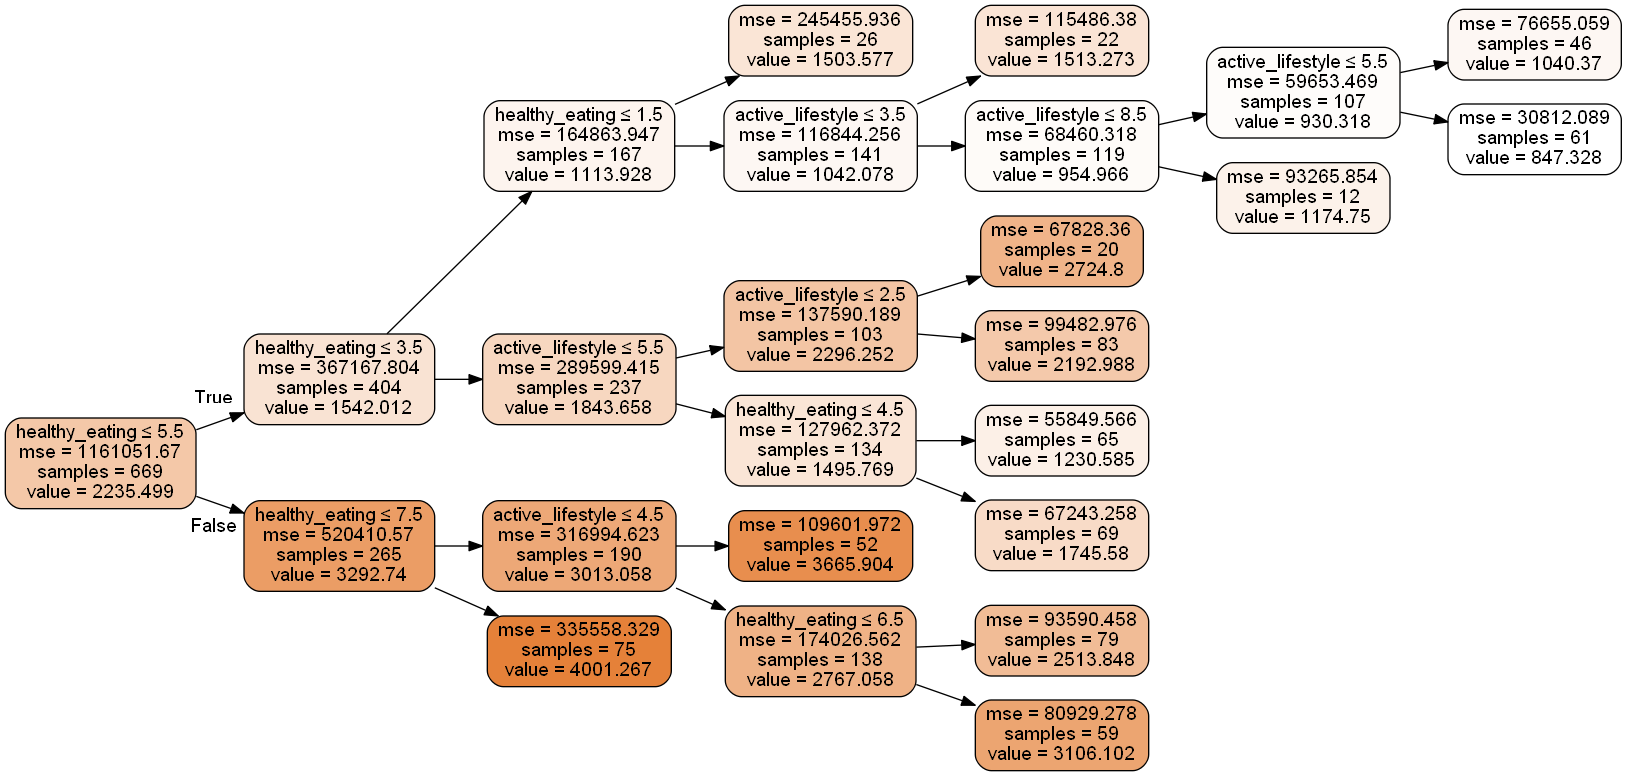

In [96]:
#https://scikit-learn.org/stable/modules/generated/sklearn.tree.export_graphviz.html
import pydotplus
from sklearn.tree import export_graphviz
from IPython.display import Image
from sklearn.externals.six import StringIO

dot_data = StringIO()

export_graphviz(clf, out_file=dot_data, filled=True, rounded=True, special_characters=True, feature_names=X_train.columns,rotate=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

Image(graph.create_png())

# Model 6 : Ensemble Techniques 

## A. Bagging

In [97]:
#https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor


parameters = {'max_depth': [5, 10, 50, 100],'n_estimators':[10, 20 , 50, 100]}
RF = RandomForestRegressor( criterion='mse')

model = GridSearchCV(RF,parameters, cv=3)

model.fit(X_train, y_train)    

print(model.best_estimator_)
print(model.score(X_train, y_train))


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=100,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)
0.9993640876763885


In [98]:
from sklearn.model_selection import GridSearchCV

RF=RandomForestRegressor(max_depth=100,n_estimators=100,criterion='mse' )
RF.fit(X_train, y_train)

y_test_pred = RF.predict(X_test)

print(r2_score(y_test,y_test_pred))

0.9958578250706425


# Boosting

In [100]:
#https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor


parameters = {'max_depth': [5, 10, 50, 100],'n_estimators':[10, 20 , 50, 100]}

clf = GradientBoostingRegressor()

model = GridSearchCV(clf,parameters, cv=3)

model.fit(X_train, y_train)    

print(model.best_estimator_)
print(model.score(X_test, y_test))


GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=5,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)
0.9986222824686013


In [102]:
from sklearn.model_selection import GridSearchCV

clf=GradientBoostingRegressor(max_depth=5,n_estimators=100)
clf.fit(X_train, y_train)

y_test_pred = clf.predict(X_test)

print(r2_score(y_test,y_test_pred))

0.9986810006637977


## Note: As we have very less data stascking is not advisable 

# Xgboost

In [105]:
import xgboost as xgb
xgb_model = xgb.XGBRegressor(random_state=42)

xgb_model.fit(X_train, y_train)


y_test_pred = xgb_model.predict(X_test)

print(r2_score(y_test,y_test_pred))



[17:07:10] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
0.9936941866761756


# 6.Model Comparison

In [4]:
#https://stackoverflow.com/questions/18601688/python-prettytable-example

from prettytable import PrettyTable
table = PrettyTable()

#setting column names
table.field_names = [ "Model", "r2_score"]

#setting row values
table.add_row(["KNN", '-0.023' ])
table.add_row(["Linear Regression" ,'0.762' ])
table.add_row(["Logistic Regression",'0.671' ])
table.add_row(["Naive Bayes" ,'0.104' ])
table.add_row(["SVM", '0.883' ])
table.add_row(["Decision Tree",'0.993' ])
table.add_row(["RandomForest",'0.999' ])
table.add_row(["GBDT" ,'0.995' ])
table.add_row(["Xgboost",'0.998' ])
table.add_row(["Stacking",'0.998' ])
print(table)

+---------------------+----------+
|        Model        | r2_score |
+---------------------+----------+
|         KNN         |  -0.023  |
|  Linear Regression  |  0.762   |
| Logistic Regression |  0.671   |
|     Naive Bayes     |  0.104   |
|         SVM         |  0.883   |
|    Decision Tree    |  0.993   |
|     RandomForest    |  0.999   |
|         GBDT        |  0.995   |
|       Xgboost       |  0.998   |
|       Stacking      |  0.998   |
+---------------------+----------+


# 7.Creating Submission File

In [ ]:
best_model=RF
from sklearn.externals import joblib
filename = 'finalized_model.sav'
joblib.dump(best_model, filename)